In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets._samples_generator import make_blobs
import random



In [2]:
df = pd.read_csv('mnist-1.csv')



# PCA

Perform PCA on the dataset to reduce each sample into a 10-dimensional feature vector. Show the covariance matrix of the transformed data. Please also copy your code snippet here.


In [8]:
class pca:
    def __init__(self, x, n_components = None):
        self.x = x
        self.n_components = n_components
        self.num_features = x.shape[0]
        self.ori_feat = x.shape[1]
        self.cov_mat = None
        self.P = None
        self.y = None

    def cov(self):
        self.cov_mat = np.cov(self.x.T)
        return self.cov_mat
    def standardization(self):
        return self.x - np.mean(self.x, axis=0)
    def reduce_feature(self):
        x_meaned = self.standardization()
        x_cov = self.cov()
        eigen_val, eigen_vec = np.linalg.eig(x_cov)
        sort_index = np.argsort(eigen_val[::-1]) #Use np.argsort()

        sorted_eigenval = eigen_val[sort_index]
        sorted_eigenvector = eigen_vec[:,sort_index]

        self.P = sorted_eigenvector[:,:self.n_components]
        self.y = np.dot(self.P.T, x_meaned.T).T
        return self.y

pca_1 = pca(df, 10)
new_df = pca_1.reduce_feature()
print(f'The input x has shape {df.shape}, and the transformed x has shape {new_df.shape}')
print(f'The sum of the input covariance matrix is {round(np.sum(pca_1.cov_mat), 5)}.')
print(f'The sum of the transformed covariance matrix is {round(np.sum(np.cov(new_df.T)).real, 5)}.')

The input x has shape (5999, 785), and the transformed x has shape (5999, 10)
The sum of the input covariance matrix is 1127.46503.
The sum of the transformed covariance matrix is 10.66681.


# K-Means

Perform k-means clustering to cluster the dataset (without applying PCA) into 10 groups. Please copy your code snippet here.

In [212]:
def k_means(x, k = 2 , epochs = 600):
    # 1. Randomly initialize k centroids
    x = x.values
    np.random.seed(2024)
    clusters = []
    
    loss_history = []

    # ==============================================================
    # "you need to randomly initialize k centroids using x"
    cluster_center = x[np.random.choice(x.shape[0], k, replace=False)]
    # ==============================================================

    for i in range(k):
        clusters.append([])
    
    # 2. Training
    for _ in range(epochs):
        new_clusters_center = np.zeros((k, x.shape[1]))
        for i in range(k):
            clusters[i]=[]

        ## a. E-step: finding points to the nearest centroid, assigning to corresponding clusters
        ## Calculate the distance from all points to the k cluster centers
        for i in range(x.shape[0]):
            xi = x[i]

            # ==============================================================
            # "Calculate the distance of xi with each centroid using norm2"
            distances = np.linalg.norm(xi - cluster_center, ord = 2, axis=1)

            # Assign points to the closest cluster
            # "Find out the nearest centroid to xi"
            # Returns the index of the nearest centriod to this datapoint
            c = np.argmin(distances)

            # ==============================================================
            clusters[c].append(i) # Append this datapoint to this cluster

        ## b. M-step: recalculate the location of the centroid using the mean of the clusters
        for i in range(k):
            # ==============================================================
            # "You need to calculate the position of the new centroids"
            if len(clusters[i]) == 0:
                new_clusters_center[i] = x[np.random.choice(x.shape[0], replace=False)]
            else:
                new_clusters_center[i] = np.sum(x[clusters[i]],axis=0) / len(clusters[i])

            # ==============================================================

        # c. If the centroid did not change, the algorithm should be stopped, otherwise continue.
        if np.all(new_clusters_center == cluster_center):
            return clusters, new_clusters_center, loss_history

        # d. update the centroid
        current_loss = 0
        for i in range(k):
            if len(clusters[i]) > 0:
                current_loss += np.sum((x[clusters[i]] - cluster_center[i])**2)
        loss_history.append(current_loss)
        # ==============================================================
        cluster_center = new_clusters_center

        # ==============================================================
    return clusters, cluster_center, loss_history


clusters, cluster_center, loss = k_means(df, 10)
for i, c in enumerate(cluster_center):
    print(f'centroid {i}: {np.sum(c)}')






centroid 0: 118.3496183206109
centroid 1: 100.15162784988814
centroid 2: 139.12107111501314
centroid 3: 126.82840746054532
centroid 4: 114.15998854087104
centroid 5: 141.24900081438335
centroid 6: 65.12302285561948
centroid 7: 95.939586296057
centroid 8: 127.76112845138067
centroid 9: 104.00697853944737


In [218]:
print(df.values[clusters[5]].shape)
print(cluster_center[5].shape)

(313, 785)
(785,)


# visualization

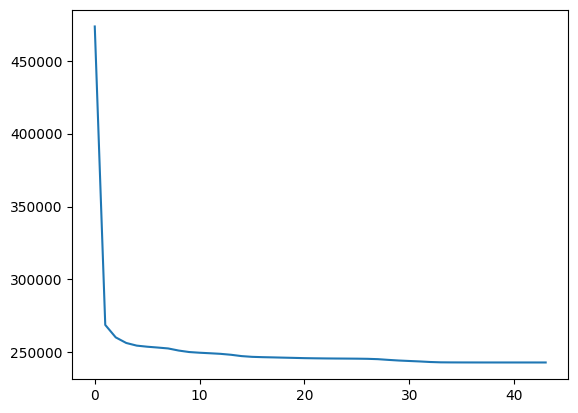

In [182]:
def plot(x, k, clusters:list, loss=[]):
    f1 = plt.figure()
    ax1 = f1.add_subplot(111)

    for i in range(k):
        ax1.scatter(x[clusters[i],0],x[clusters[i],1])

    if loss:
        f2 = plt.figure()
        ax2 = f2.add_subplot(111)
        ax2.plot([i for i in range(len(loss))], loss)
        ax2.set_title('Epochs vs Loss')
        ax2.set_xlabel('Epochs')
        ax2.set_ylabel('Loss')
    plt.show()

plt.plot(loss)

# find optimal k

In [176]:
from sklearn.metrics import silhouette_score

def k_means(x, k = 2 , epochs = 600):
    # 1. Randomly initialize k centroids
    x = x.values
    np.random.seed(2024)
    clusters = []
    result = 0
    # ==============================================================
    # "you need to randomly initialize k centroids using x"
    cluster_center = x[np.random.choice(x.shape[0], k, replace=False)]
    # ==============================================================

    for i in range(k):
        clusters.append([])
    
    # 2. Training
    for _ in range(epochs):
        new_clusters_center = np.zeros((k, x.shape[1]))
        for i in range(k):
            clusters[i]=[]

        ## a. E-step: finding points to the nearest centroid, assigning to corresponding clusters
        ## Calculate the distance from all points to the k cluster centers
        for i in range(x.shape[0]):
            xi = x[i]

            # ==============================================================
            # "Calculate the distance of xi with each centroid using norm2"
            distances = np.linalg.norm(xi - cluster_center, ord = 2, axis=1)

            # Assign points to the closest cluster
            # "Find out the nearest centroid to xi"
            # Returns the index of the nearest centriod to this datapoint
            c = np.argmin(distances)

            # ==============================================================
            clusters[c].append(i) # Append this datapoint to this cluster

        ## b. M-step: recalculate the location of the centroid using the mean of the clusters
        for i in range(k):
            # ==============================================================
            # "You need to calculate the position of the new centroids"
            if len(clusters[i]) == 0:
                new_clusters_center[i] = x[np.random.choice(x.shape[0], replace=False)]
            else:
                new_clusters_center[i] = np.sum(x[clusters[i]],axis=0) / len(clusters[i])

            # ==============================================================

        # c. If the centroid did not change, the algorithm should be stopped, otherwise continue.
        if np.all(new_clusters_center == cluster_center):
            for i in range(k):

                cluster_points = x[clusters[i]]  # Get all points in cluster `i`
                print(clusters)
                centroid = cluster_center[i]     # Get the centroid of cluster `i`
                total_distance = np.sum(np.linalg.norm(cluster_points - centroid, ord = 2, axis=1))
                result += total_distance

            return clusters, new_clusters_center, result

        # d. update the centroid
        loss.append(abs(np.sum(new_clusters_center - cluster_center)))
        # ==============================================================
        cluster_center = new_clusters_center

        # ==============================================================
    return clusters, cluster_center, result


loss = []
result_arr = []

#for k in range(2, 30):
#  kmeans = KMeans(n_clusters = k).fit(x)
#  labels = kmeans.labels_
#  sil.append(silhouette_score(x, labels, metric = 'euclidean'))


clusters, cluster_center, result = k_means(df, 10)
#for k in range(2,40):
#    clusters, cluster_center, result = k_means(df, k)
#    result_arr.append(result)

#plt.plot(result_arr)

KeyboardInterrupt: 

# OWwn write

In [186]:
from sklearn.metrics import silhouette_score

def k_means(x, k = 2 , epochs = 600):
    # 1. Randomly initialize k centroids
    x = x.values
    np.random.seed(2024)
    clusters = []
    datapoint = []
    cluster_arr = []    # ==============================================================
    # "you need to randomly initialize k centroids using x"
    cluster_center = x[np.random.choice(x.shape[0], k, replace=False)]
    # ==============================================================

    for i in range(k):
        clusters.append([])
    
    # 2. Training
    for _ in range(epochs):
        new_clusters_center = np.zeros((k, x.shape[1]))
        for i in range(k):
            clusters[i]=[]

        ## a. E-step: finding points to the nearest centroid, assigning to corresponding clusters
        ## Calculate the distance from all points to the k cluster centers
        for i in range(x.shape[0]):
            xi = x[i]

            # ==============================================================
            # "Calculate the distance of xi with each centroid using norm2"
            distances = np.linalg.norm(xi - cluster_center, ord = 2, axis=1)

            # Assign points to the closest cluster
            # "Find out the nearest centroid to xi"
            # Returns the index of the nearest centriod to this datapoint
            c = np.argmin(distances)

            # ==============================================================
            clusters[c].append(i) # Append this datapoint to this cluster

        ## b. M-step: recalculate the location of the centroid using the mean of the clusters
        for i in range(k):
            # ==============================================================
            # "You need to calculate the position of the new centroids"
            if len(clusters[i]) == 0:
                new_clusters_center[i] = x[np.random.choice(x.shape[0], replace=False)]
            else:
                new_clusters_center[i] = np.sum(x[clusters[i]],axis=0) / len(clusters[i])

            # ==============================================================

        # c. If the centroid did not change, the algorithm should be stopped, otherwise continue.
        
        if np.all(new_clusters_center == cluster_center):

            for i in range(k):
                for data in clusters[i]:
                    cluster_points = x[data]  # Get all points in cluster `i`
                    datapoint.append(cluster_points)
                    centroid = cluster_center[i]     # Get the centroid of cluster `i`
                    cluster_arr.append(i)


            return clusters, new_clusters_center, datapoint, cluster_arr

        # d. update the centroid
        loss.append(abs(np.sum(new_clusters_center - cluster_center)))
        # ==============================================================
        cluster_center = new_clusters_center

        # ==============================================================
    return clusters, cluster_center, datapoint, cluster_arr


loss = []
result_arr = []

#result_arr.append(silhouette_score(datapoint, cluster_arr, metric = 'euclidean'))

for k in range(2, 30):
  clusters, cluster_center, datapoint, cluster_arr = k_means(df, k)
  result_arr.append(silhouette_score(datapoint, cluster_arr, metric = 'euclidean'))


#for k in range(2,40):
#    clusters, cluster_center, result = k_means(df, k)
#    result_arr.append(result)

#plt.plot(result_arr)

KeyboardInterrupt: 

In [ ]:
plt.plot(result_arr)

# second implement


In [188]:
def k_means(x, k = 2 , epochs = 600):
    # 1. Randomly initialize k centroids
    x = x.values
    np.random.seed(2024)
    clusters = []
    
    loss_history = []

    # ==============================================================
    # "you need to randomly initialize k centroids using x"
    cluster_center = x[np.random.choice(x.shape[0], k, replace=False)]
    # ==============================================================

    for i in range(k):
        clusters.append([])
    
    # 2. Training
    for _ in range(epochs):
        new_clusters_center = np.zeros((k, x.shape[1]))
        for i in range(k):
            clusters[i]=[]

        ## a. E-step: finding points to the nearest centroid, assigning to corresponding clusters
        ## Calculate the distance from all points to the k cluster centers
        for i in range(x.shape[0]):
            xi = x[i]

            # ==============================================================
            # "Calculate the distance of xi with each centroid using norm2"
            distances = np.linalg.norm(xi - cluster_center, ord = 2, axis=1)

            # Assign points to the closest cluster
            # "Find out the nearest centroid to xi"
            # Returns the index of the nearest centriod to this datapoint
            c = np.argmin(distances)

            # ==============================================================
            clusters[c].append(i) # Append this datapoint to this cluster

        ## b. M-step: recalculate the location of the centroid using the mean of the clusters
        for i in range(k):
            # ==============================================================
            # "You need to calculate the position of the new centroids"
            if len(clusters[i]) == 0:
                new_clusters_center[i] = x[np.random.choice(x.shape[0], replace=False)]
            else:
                new_clusters_center[i] = np.sum(x[clusters[i]],axis=0) / len(clusters[i])

            # ==============================================================

        # c. If the centroid did not change, the algorithm should be stopped, otherwise continue.
        if np.all(new_clusters_center == cluster_center):
            return clusters, new_clusters_center, loss_history

        # d. update the centroid
        loss = 0
        for i in range(k):
            if len(clusters[i]) > 0:
                current_loss += np.sum((x[clusters[i]] - cluster_center[i])**2)
        loss_history.append(loss)
        # ==============================================================
        cluster_center = new_clusters_center

        # ==============================================================
    return clusters, cluster_center, loss_history

loss_arr = []

for k in range(2, 30):
  clusters, cluster_center, loss_history = k_means(df, k)
  loss_arr.append(np.mean(loss_history))


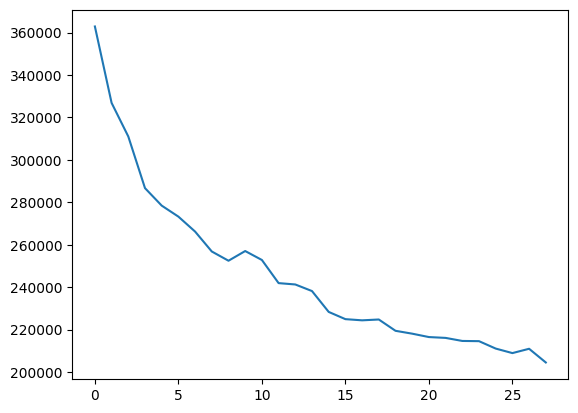

In [189]:
plt.plot(loss_arr)

# second implement test 2
this one is correct

In [191]:
def k_means(x, k = 2 , epochs = 600):
    # 1. Randomly initialize k centroids
    x = x.values
    np.random.seed(2024)
    clusters = []
    

    # ==============================================================
    # "you need to randomly initialize k centroids using x"
    cluster_center = x[np.random.choice(x.shape[0], k, replace=False)]
    # ==============================================================

    for i in range(k):
        clusters.append([])
    
    # 2. Training
    for _ in range(epochs):
        new_clusters_center = np.zeros((k, x.shape[1]))
        for i in range(k):
            clusters[i]=[]

        ## a. E-step: finding points to the nearest centroid, assigning to corresponding clusters
        ## Calculate the distance from all points to the k cluster centers
        for i in range(x.shape[0]):
            xi = x[i]

            # ==============================================================
            # "Calculate the distance of xi with each centroid using norm2"
            distances = np.linalg.norm(xi - cluster_center, ord = 2, axis=1)

            # Assign points to the closest cluster
            # "Find out the nearest centroid to xi"
            # Returns the index of the nearest centriod to this datapoint
            c = np.argmin(distances)

            # ==============================================================
            clusters[c].append(i) # Append this datapoint to this cluster

        ## b. M-step: recalculate the location of the centroid using the mean of the clusters
        for i in range(k):
            # ==============================================================
            # "You need to calculate the position of the new centroids"
            if len(clusters[i]) == 0:
                new_clusters_center[i] = x[np.random.choice(x.shape[0], replace=False)]
            else:
                new_clusters_center[i] = np.sum(x[clusters[i]],axis=0) / len(clusters[i])

            # ==============================================================

        # c. If the centroid did not change, the algorithm should be stopped, otherwise continue.
        if np.all(new_clusters_center == cluster_center):
            loss = 0
            for i in range(k):
                if len(clusters[i]) > 0:
                    loss += np.sum((x[clusters[i]] - cluster_center[i])**2)
            return clusters, new_clusters_center, loss

        # d. update the centroid

        # ==============================================================
        cluster_center = new_clusters_center

    loss = 0
    for i in range(k):
        if len(clusters[i]) > 0:
            loss += np.sum((x[clusters[i]] - cluster_center[i])**2)
        # ==============================================================
    return clusters, cluster_center, loss

loss_arr = []

for k in range(2, 30):
  clusters, cluster_center, loss = k_means(df, k)
  loss_arr.append(loss)


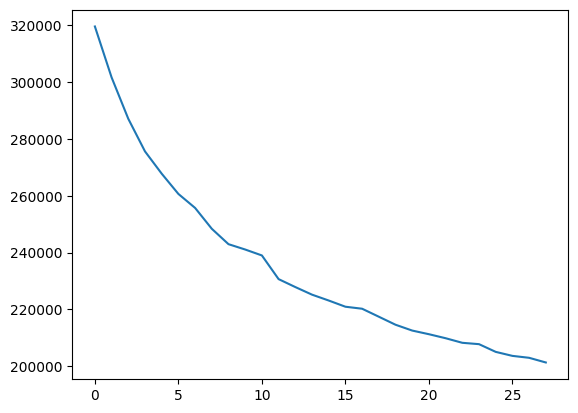

In [192]:
plt.plot(loss_arr)

In [233]:
def k_means(x, k = 2 , epochs = 600):
    # 1. Randomly initialize k centroids
    np.random.seed(2024)
    clusters = []
    
    # ==============================================================
    # "you need to randomly initialize k centroids using x"
    cluster_center = x[np.random.choice(x.shape[0], k, replace=False)]
    # ==============================================================

    for i in range(k):
        clusters.append([])
    
    # 2. Training
    for _ in range(epochs):
        new_clusters_center = np.zeros((k, x.shape[1]))
        for i in range(k):
            clusters[i]=[]

        ## a. E-step: finding points to the nearest centroid, assigning to corresponding clusters
        ## Calculate the distance from all points to the k cluster centers
        for i in range(x.shape[0]):
            xi = x[i]

            # ==============================================================
            # "Calculate the distance of xi with each centroid using norm2"
            distances = np.linalg.norm(xi - cluster_center, ord = 2, axis=1)

            # Assign points to the closest cluster
            # "Find out the nearest centroid to xi"
            # Returns the index of the nearest centriod to this datapoint
            c = np.argmin(distances)

            # ==============================================================
            clusters[c].append(i) # Append this datapoint to this cluster

        ## b. M-step: recalculate the location of the centroid using the mean of the clusters
        for i in range(k):
            # ==============================================================
            # "You need to calculate the position of the new centroids"
            if len(clusters[i]) == 0:
                new_clusters_center[i] = x[np.random.choice(x.shape[0], replace=False)]
            else:
                new_clusters_center[i] = np.sum(x[clusters[i]],axis=0) / len(clusters[i])

            # ==============================================================

        # c. If the centroid did not change, the algorithm should be stopped, otherwise continue.
        if np.all(new_clusters_center == cluster_center):

            return clusters, new_clusters_center

        # d. update the centroid

        # ==============================================================
        cluster_center = new_clusters_center

        # ==============================================================
    return clusters, cluster_center

def find_best_k (training_set, validation_set):
    result_lose_arr = []
    result = 999
    result_index = 0

    for k in range(2, 30):
        clusters, cluster_center = k_means(training_set, k)
        
        validation_cluster = []
        for i in range(k):
            validation_cluster.append([])

        for i in range(validation_set.shape[0]):
            xi = validation_set[i]

            # ==============================================================
            # "Calculate the distance of xi with each centroid using norm2"
            distances = np.linalg.norm(xi - cluster_center, ord = 2, axis=1)

            # Assign points to the closest cluster
            # "Find out the nearest centroid to xi"
            # Returns the index of the nearest centriod to this datapoint
            c = np.argmin(distances)

            # ==============================================================
            validation_cluster[c].append(i) # Append this datapoint to this cluster

        validation_loss = 0
        for i in range(k):
            if len(validation_cluster[i]) > 0:
                validation_loss += np.sum((validation_set[validation_cluster[i]] - cluster_center[i])**2)
        result_lose_arr.append(validation_loss)

    for i in range(len(result_lose_arr)):
        if result_lose_arr[i] < result:
            result = result_lose_arr[i]
            result_index = i


    return result_lose_arr, result, result_index


train = df.iloc[:4000].values
val = df.iloc[4000:].values
result_lose_arr, result, result_index = find_best_k (train, val)



([109049.84785252216,
  104220.13104922384,
  97988.67000034986,
  95725.99128561089,
  93033.22146378679,
  88758.63344025449,
  86451.8018034024,
  84692.80551577672,
  83709.45843034131,
  82201.57706046719,
  81263.73261686278,
  80410.7080068769,
  78557.12570139037,
  77745.99391850735,
  76678.28569722071,
  76142.11127964588,
  74720.4336761779,
  74139.96831422814,
  73549.69336650563,
  72830.16919780117,
  72043.46737122769,
  71490.13699544202,
  70975.57231779795,
  70921.8963862083,
  70631.20194014093,
  70390.04036857831,
  69977.18316656679,
  69943.26778126859],
 999,
 0)

# kernel k-means algorithm with RBF-kernel

Please only use the first 500 samples and cluster the them into 5 groups. This is for reducing the running time of your code. 

Please copy your code snippet here.

TIPS: If you can use matrix operations to replace summations, your code will be more efficient. However, this is just optional.

In [172]:
def k_means(x, k = 2 , epochs = 600):
    # 1. Randomly initialize k centroids
    np.random.seed(2024)
    clusters = []

    # ==============================================================
    # "you need to randomly initialize k centroids using x"
    cluster_center = x[np.random.choice(x.shape[0], k, replace=False)]
    # ==============================================================

    for i in range(k):
        clusters.append([])
    
    # 2. Training
    for _ in range(epochs):
        new_clusters_center = np.zeros((k, x.shape[1]))
        for i in range(k):
            clusters[i]=[]

        ## a. E-step: finding points to the nearest centroid, assigning to corresponding clusters
        ## Calculate the distance from all points to the k cluster centers
        for i in range(x.shape[0]):
            xi = x[i]

            # ==============================================================
            # "Calculate the distance of xi with each centroid using norm2"
            distances = np.linalg.norm(xi - cluster_center, ord = 2, axis=1)

            # Assign points to the closest cluster
            # "Find out the nearest centroid to xi"
            # Returns the index of the nearest centriod to this datapoint
            c = np.argmin(distances)

            # ==============================================================
            clusters[c].append(i) # Append this datapoint to this cluster

        ## b. M-step: recalculate the location of the centroid using the mean of the clusters
        for i in range(k):
            # ==============================================================
            # "You need to calculate the position of the new centroids"
            if len(clusters[i]) == 0:
                new_clusters_center[i] = x[np.random.choice(x.shape[0], replace=False)]
            else:
                new_clusters_center[i] = np.sum(x[clusters[i]],axis=0) / len(clusters[i])

            # ==============================================================

        # c. If the centroid did not change, the algorithm should be stopped, otherwise continue.
        if np.all(new_clusters_center == cluster_center):
            return clusters, new_clusters_center

        # d. update the centroid
        loss.append(abs(np.sum(new_clusters_center - cluster_center)))
        # ==============================================================
        cluster_center = new_clusters_center

        # ==============================================================
    return clusters, cluster_center



def cal_RBF(x):
    ## implement RBF method
    n = x.shape[0]
    # ==============================================================
    # "You need to initialize k"
    kernel_x = np.zeros((n,n))

    # ==============================================================
    sigma = 0

    for i in range(n):
        for j in range(n):
            # ==============================================================
            # "You need to implement sigma here"
            sigma += np.linalg.norm(x[i] - x[j]) ** 2

            # ==============================================================
    sigma = 2 * sigma/(n**2)
    # gamma = 1/(2*sigma)

    for i in range(n):
        for j in range(n):
            # ==============================================================
            # "You need to implement kernel x here"
            kernel_x[i, j] = np.exp(-(np.linalg.norm(x[i]-x[j]))**2/sigma)
            #kernel_x[i, j] = np.exp(-gamma * np.linalg.norm(x[i]-x[j]))**2)

            # ==============================================================
    #kernel_x = k
    return kernel_x

kernel_x = cal_RBF(df[:500].values)


In [173]:
clusters, cluster_center = k_means(kernel_x, 5)


(500, 785)


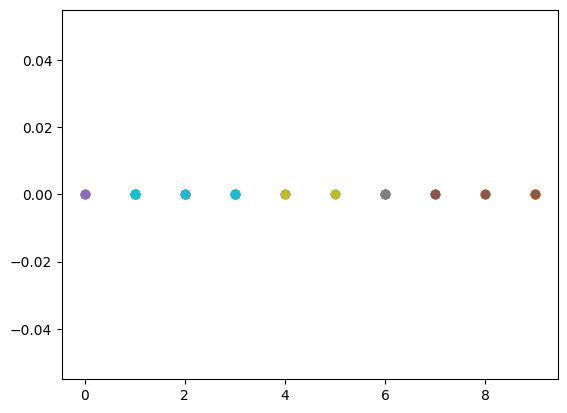